
## Homework
[课时33](http://study.163.com/course/courseLearn.htm?courseId=1050010#/learn/video?lessonId=1003346282&courseId=1050010)

In [1]:
# 3-1 求三维正交基, 已知A=(1, 2, 3) B=(1, 1, 1), 求AB所在平面和A垂直的向量
#!/usr/bin/python
# -*- coding: utf-8 -*-
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Latex, display

display(Latex(r"$I\hat{x} = (A^{T}A)^{-1}A^{T}C \quad Then: P = A\hat{x}$"))

<IPython.core.display.Latex object>

In [2]:
A = np.array([[1], [2], [3]])
B = np.array([[1], [1], [1]])

x = np.linspace(-0.5, 1, 10)
x.shape = (1, 10)
xx = A.dot(x)

TMP = A.T.dot(B)
AA = np.linalg.inv(A.T.dot(A))

# 对应最小二乘法的IX
P = A.dot(AA).dot(TMP)
E = B-P

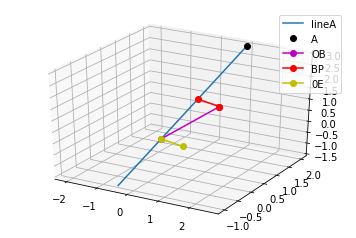

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xx[0,:], xx[1,:], xx[2,:], label="lineA")
ax.plot(A[0], A[1], A[2], 'ko', label="A")
ax.plot([0, B[0]], [0, B[1]], [0, B[2]], 'm-o', label="OB")
ax.plot([B[0][0],P[0][0]],[B[1][0],P[1][0]],[B[2][0],P[2][0]],'r-o',label="BP")
ax.plot([0,E[0]],[0,E[1]],[0,E[2]],'y-o',label="0E")

ax.legend()
ax.axis('equal')
plt.show()

<IPython.core.display.Latex object>

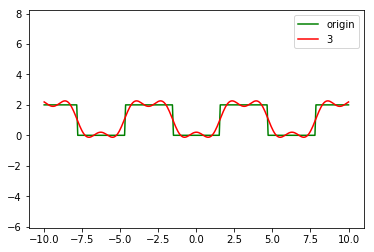

In [4]:
# homework 3-2 用正弦函数拟合方波, 傅里叶级数
#!/usr/bin/env python
# coding: utf-8
#copyRight by heibanke

import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import Latex, Math, display

display(Latex(r"$I\hat{x} = (A^{T}A)^{-1}A^{T}C\quad Then: P = A\hat{x}$"))

# 产生一个方波(x,y)
x = np.linspace(-10,10,300) 
y=[]
for i in np.cos(x):
    if i>0:
        y.append(0)
    else:
        y.append(2)
y=np.array(y)

def fourier(x, y, n):
    m = []

    for i in xrange(n):
        # xrange产生数列左开右闭, 所以需要 + x
        m.append(np.cos(i*x + x))
        m.append(np.sin(i*x + x))
    
    # np.mat可以直接用*做矩阵点乘, 否则需要 .dot(x)
    mx = np.mat(m).T
    
    # 方波把0轴移动到y值平均线上
    y2 = y.reshape(y.shape[0], 1) - np.mean(y)

    # 到y这条曲线上最近的点, 用最小二乘法拟合
    w = np.linalg.inv(mx.T * mx) * mx.T * y2

    yw = np.array(mx*w) + np.mean(y)
    yw.shape = (yw.shape[0],)
    
    return yw

plt.plot(x,y,color='g',label='origin') 
plt.plot(x,fourier(x,y,3),color='r',label='3')
# plt.plot(x,fourier(x,y,8),color='b',label='8')
# plt.plot(x,fourier(x,y,23),color='k',label='23')

plt.legend()
plt.axis('equal')
plt.show()

[[ 0.75  0.25]
 [ 0.5   1.  ]]
蓝点为Ax, 红点为\lambda x


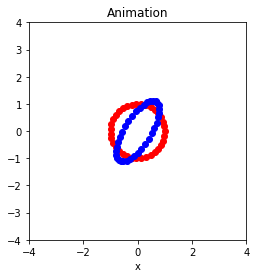

In [8]:
# homework 3-3 用python实现 eigshow, 用图示展示 Ax = \lambda x , 即特征值和特征向量
#!/usr/bin/env python
# coding: utf-8
#copyRight by heibanke

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

A = np.array([[3,1],[2,4]])/4.0

print A

def eigshow(A):
    w=np.linspace(0, 2*np.pi, 36)
    x=np.array([np.cos(w),np.sin(w)])
    ax = A.dot(x)

    def update(num):
        s1.set_data(x[:, 0:num])
        s2.set_data(ax[:, 0:num])
        return s1,s2

    fig1 = plt.figure()

    s1, = plt.plot([], [], 'ro', label='Ax')
    s2, = plt.plot([], [], 'bo', label='lambda x')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel('x')
    plt.title('Animation')
    plt.gca().set_aspect(1)
    
    # See help(animation.FuncAnimation)
    line_ani = animation.FuncAnimation(fig1, update, frames=36, interval=200, blit=False, repeat=False)
    # ipython 无法直接显示绘制过程, 保存为gif格式
    line_ani.save('eigshow.gif', writer='imagemagick')

    os.system('xdg-open eigshow.gif')

print "\033[31m蓝点为Ax, 红点为\lambda x\033[0m"

eigshow(A)

In [81]:
# Homework 3-4 评估使用特征根求解和普通求解裴波那契数列的时间开销和准确性
#!/usr/bin/env python
# coding: utf-8
#copyRight by heibanke

import numpy as np  
import matplotlib.pyplot as plt
from math import *
from IPython.display import Latex, Math, display

import time
def time_cost(f):
    def _f(*arg, **kwarg):
        start = time.clock()
        a = f(*arg, **kwarg)
        end = time.clock()
        print f.__name__, "run cost time is ", end - start
        return a, end-start
    return _f

   
@time_cost
def fib_opt_seq(seq):
    return [fib_opt(i) for i in seq]
    
def fib_opt(n):
    a,b,i = 0, 1, 0
    
    while i<n:
        a, b = b, a+b
        i += 1
    else:
        return b


display(Latex(r"$U_{k} = S\land^{k}S^{-1}U_{0}$"))
A = np.array([[1,1],[1,0]])
eigval, S = np.linalg.eig(A)    # return Eigenvalues and vectors of a square matrix
x = np.array([[1],[0]])
z = np.linalg.inv(S).dot(x)

@time_cost
def fib_eig_seq(seq):
    return [fib_eig(i) for i in seq]
    
def fib_eig(N):
    def lamda_n(lamda,n):
        a = np.array([[lamda[0]**n,0],[0,lamda[1]**n]])
        return a

    if N>=2:
        y = S.dot(lamda_n(eigval,N+1).dot(z))
        return y[1]
    elif N<0:
        assert False, "N must larger than zeros"
    else:
        return x[1-N]
        
import random

# 实验得出当级数比较大时(大于250左右)通过特征根求解才显现出时间开销的优势
seq = range(250)
a, time1 = fib_opt_seq(seq)
print "%e\n" % (a[-1])

# write Your code fib_eig_seq function
b, time2 = fib_eig_seq(seq)
print b[-1][0]

#print a/b[-1][0]
print "\nCost time time2/time1 : %f%%\nAccuracy rate is       %f%%" % (time2/time1*100, b[-1][0]/a[-1]*100)
# print "%e" % (b[-1])

<IPython.core.display.Latex object>

fib_opt_seq run cost time is  0.003951
7.896326e+51

fib_eig_seq run cost time is  0.004596
7.89632582613e+51

Cost time time2/time1 : 116.324981%
Accuracy rate is       100.000000%


[课时34](http://study.163.com/course/courseLearn.htm?courseId=1050010#/learn/video?lessonId=1003361073&courseId=1050010)

**Homework 3-5 北京3200W人口, 每年20%去上海, 上海4000人口, 每年10%去北京, 100年后两城市人口? 假设总人口不变**

In [110]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np

# 马尔科夫矩阵 满足两条性质: 1) 所有元素大于等于0 2) 所有矩阵的列相加等于1(这个性质保证了特征值为1)
A = np.array([[0.8, 0.1], [0.2, 0.9]])
x = np.array([[3200], [4000]])
N_years = 50

def count_people(A, x, years):
    eigval, S = np.linalg.eig(A)
    #print eigval, '\n', S
    
    Lambda = np.zeros(A.shape)
    for i in xrange(A.shape[0]):
        Lambda[i, i] = eigval[i] ** N_years
        
    z = S.dot(Lambda).dot(np.linalg.inv(S)).dot(x)
    
    print "北京 : %d W, 上海 : %d W" % (z[[0]], z[[1]])
    return z

count_people(A, x, N_years)


北京 : 2400 W, 上海 : 4799 W


array([[ 2400.00001439],
       [ 4799.99998561]])

**在作业3-6之前先了解下MNIST文件的格式**
#### TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
<pre><code>
[offset] [type]          [value]          [description]  
0000     32 bit integer  0x00000803(2051) magic number  
0004     32 bit integer  60000            number of images  
0008     32 bit integer  28               number of rows  
0012     32 bit integer  28               number of columns  
0016     unsigned byte   ??               pixel  
0017     unsigned byte   ??               pixel  
........  
xxxx     unsigned byte   ??               pixel  
</code></pre>
**也就是之前我们在读取图片象素前要先读取4个 32bit integer...**

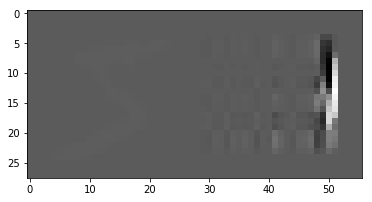

In [243]:
# Homework 3-6 字库图片降维压缩
#!/usr/bin/env python
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

import struct
 
filename = 'data/train-images-idx3-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()

# '>IIII'是说使用大端法读取4个unsinged int
index = [struct.calcsize('>IIII')]

def get_pic(buf, index):
    img = struct.unpack_from('>784B' ,buf, index[0])
    index[0] += struct.calcsize('>784B')
    
    return np.array(img).reshape(28, 28)

def svd(data, k=0.9):
    # 求协方差方阵
    cov = np.cov(data, rowvar=0)
    # 求方阵的svd分解, 注意Σ(即 s 来源于 AA.T 或 A.TA 的特征值的平方根, 且降序排列)
    # 如果存在Ax = λx, 则 A = uΣu^{-1}
    u, s, v = np.linalg.svd(cov)
    S = np.diag(s)
    
    # 如果占主要成分的前i+1项占总成分的k, 丢弃其余成分降维
    for i in xrange(len(s)-1):
        if sum(s[:i+1])/sum(s) > k:
            #print i+1
            break
    # s矩阵降维后行列为i+1, u矩阵的列应该只取i+1项
    u_s = u[:, :i+1]

    # TODO 此处没能理解! 与原函数传入data不同?
#     print 'u_s:\n', u_s
#     print 'S[:i+1, :i+1]\n', S[:i+1, :i+1]
#     print 'v[:i+1][:]\n', v[:i+1][:]
    # 此处需要返回的矩阵不能是浮点数矩阵,否则绘图错误
    return u_s.dot(S[:i+1, :i+1]).dot(v.T[:i+1][:])
#     return s[:, :i+1] * np.dot(u[:, :i+1], v[i+1, :])

def show_pic(sample, recon_sample):
    showpixels = np.zeros((28, 28*2), dtype='int64')
    #print recon_sample.reshape(28,28)
    for i in xrange(1):
        showpixels[28*i:28*(i+1), :28] = sample.reshape(28,28)
        showpixels[28*i:28*(i+1), 28:] = recon_sample.reshape(28,28)
    plt.imshow(np.floor(showpixels), cmap="gray")
    plt.show()

im = get_pic(buf, index)
im2 = svd(im)
# print im.dtype, im2.dtype
# np.rint(im2).astype("int64")
# print im.dtype, im2.dtype

show_pic(im, im2)

In [229]:
# svd 图片压缩
from PIL import Image
import numpy as np
import os

def rebuild_img(u, sigma, v, p): #p表示奇异值的百分比
#     print p
    m = len(u)
    n = len(v)
    a = np.zeros((m, n))

    count = (int)(sum(sigma))
    curSum = 0
#     k = 0
    while curSum <= count * p:
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        a += sigma[k] * np.dot(uk, vk)   # 此处应有掌声, sigma实际上是对各维度进行拉伸
        curSum += sigma[k]
#         k += 1
#     print 'k:',k
    a[a < 0] = 0
    a[a > 255] = 255
    #按照最近距离取整数，并设置参数类型为uint8
    return np.rint(a).astype("uint8")

if __name__ == '__main__':
    img = Image.open('../res/dog.jpg', 'r')
    a = np.array(img)

    # jpg文件看成 [行][列][颜色] 三维数列
    for p in np.arange(0.1, 1, 0.1):
        u, sigma, v = np.linalg.svd(a[:, :, 0])
        R = rebuild_img(u, sigma, v, p)

        u, sigma, v = np.linalg.svd(a[:, :, 1])
        G = rebuild_img(u, sigma, v, p)

        u, sigma, v = np.linalg.svd(a[:, :, 2])
        B = rebuild_img(u, sigma, v, p)

        I = np.stack((R, G, B), 2)
        #保存图片在img文件夹下
        Image.fromarray(I).save("svd_" + str(int(p * 100)) + ".jpg")
        os.system('xdg-open .')